# Books Recommender system using clustering
Collaborative filtering
- Dataset :- https://www.kaggle.com/ra4u12/bookrecommendation

In [2]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\DCL\AppData\Local\Temp\ipykernel_9504\518567591.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [6]:
# !curl "http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg" --out.png
# !curl http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg --output some.jpg

In [7]:
books.shape

(271360, 8)

In [8]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

#### Conclution:
Here Image URL columns is important for the poster. So, we will keep it

In [9]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [11]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [12]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [13]:
# Now load the second dataframe

users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\DCL\AppData\Local\Temp\ipykernel_9504\3895409190.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')


In [14]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
users.shape

(278858, 3)

In [16]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [17]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [18]:
# Now load the third dataframe

ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\DCL\AppData\Local\Temp\ipykernel_9504\674147958.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')


In [19]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
ratings.shape

(1149780, 3)

In [21]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [22]:
ratings.head(10)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


### Conclution:
Now we have 3 dataframes
- books
- users
- ratings

In [23]:
print(books.shape, users.shape, ratings.shape, sep='\n')



(271360, 6)
(278858, 3)
(1149780, 3)


In [24]:
ratings['user_id'].value_counts().shape

(105283,)

In [25]:
ratings['user_id'].unique().shape

(105283,)

In [26]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [27]:
x[x].shape

(899,)

In [28]:
y= x[x].index

In [29]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [30]:
ratings = ratings[ratings['user_id'].isin(y)]

In [31]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [32]:
ratings.shape

(526356, 3)

In [33]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')

In [34]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [35]:
ratings_with_books.shape

(487671, 8)

In [36]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [37]:
number_rating.head(10)

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
5,Dark Justice,1
6,Deceived,1
7,Earth Prayers From around the World: 365 Pray...,3
8,Final Fantasy Anthology: Official Strategy Gu...,3
9,Flight of Fancy: American Heiresses (Zebra Ba...,1


In [38]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [39]:
number_rating.head(10)

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
5,Dark Justice,1
6,Deceived,1
7,Earth Prayers From around the World: 365 Pray...,3
8,Final Fantasy Anthology: Official Strategy Gu...,3
9,Flight of Fancy: American Heiresses (Zebra Ba...,1


In [40]:
final_rating = ratings_with_books.merge(number_rating, on='title')

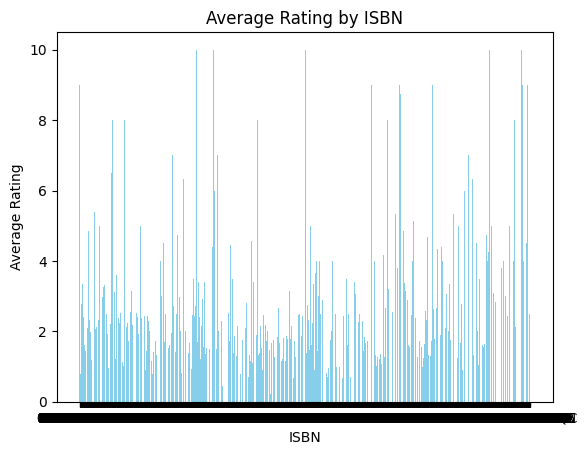

In [89]:
df = pd.DataFrame(final_rating)

# Group by ISBN and calculate the average rating
avg_rating = df.groupby('ISBN')['rating'].mean()

# Plotting the bar chart
plt.bar(avg_rating.index, avg_rating.values, color='skyblue')
plt.xlabel('ISBN')
plt.ylabel('Average Rating')
plt.title('Average Rating by ISBN')
plt.show()

In [87]:
df

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [41]:
final_rating.head(10)

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
6,24194,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
7,25981,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
8,26535,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
9,28204,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [42]:
final_rating.shape

(487671, 9)

In [43]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [44]:
final_rating.head(10)

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
6,24194,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
7,25981,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
8,26535,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
9,28204,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [45]:
final_rating.shape

(61853, 9)

In [46]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [47]:
final_rating.shape

(59850, 9)

In [48]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values= 'rating')

In [49]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [50]:
book_pivot.shape

(742, 888)

In [51]:
book_pivot.fillna(0, inplace=True)

In [52]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

In [53]:
from scipy.sparse import csr_matrix

In [54]:
book_sparse = csr_matrix(book_pivot)

In [55]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [56]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [57]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [58]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [59]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [60]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [61]:
book_pivot.iloc[241,:]

user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Sorcerer's Stone (Book 1), Length: 888, dtype: float64

In [62]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [63]:
book_pivot.index[3]

'4 Blondes'

In [64]:
#keeping books name
book_names = book_pivot.index

In [65]:
book_names[2]

'2nd Chance'

In [66]:
np.where(book_pivot.index == '4 Blondes')[0][0]

3

# find url

In [67]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [68]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [69]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])
    
    

In [70]:
book_name[0]

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')

In [71]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_rating['title'] == name)[0][0]
    ids_index.append(ids)

In [72]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


In [73]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

# Testing model

In [74]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [75]:
book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(book_name)

You searched 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggestion books are: 

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall
